<a href="https://colab.research.google.com/github/KilovoIt/Unit-_1-revised/blob/main/Stepan_DS18_LS_DS_121_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Assignment 1*

# Apply the t-test to real data

## Practice 1-Sample T-tests

One Sample t-tests determine whether or not a sample mean is statistically different from some known (or hypothesized) population mean. 

### 1) Load the Data
- Use the [automobile dataset](https://archive.ics.uci.edu/ml/datasets/Automobile)
- Fix the column headers
- Make sure NaNs are used to indicate missing values

Feel free to add code cells and text cells as needed throughout the assignment.

In [ ]:
### YOUR WORK HERE
!curl 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
import pandas as pd
import numpy as np


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', names=['symboling', 'normalized-losses',  'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', ' fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', ' city-mpg', 'highway-mpg', 'price'] )



3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
2,?,audi,gas,std,two,sedan,fwd,front,99.80,177.30,66.30,53.10,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
1,158,audi,gas,std,four,sedan,fwd,front,105.80,192.70,71.40,55.70,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,?,audi,gas,std,four,wagon,fwd,front,105.80,192.70,71.40,55.70,2954,ohc,five,136,mpfi,3.19,3.40,8.50,1

In [ ]:
df.replace('?',np.nan, inplace=True)
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 2) Pretend that this dataset represents the cars at a used car lot in your local town. 

- Use df.sample() to pick a random sample of 10 cars. Note that because this sample is random we are going to set the `random_state` so that all of us in the class get the same random sample. Please set your random state to `30` when using `df.sample()`

Is your sample reflective of the population value in regards to highway-mpg? Find the mean for `highway-mpg` for the entire dataset and compare your sample mean estimate to that value. Can you say that they are different? 

In [ ]:
### YOUR WORK HERE
df_sample = df.sample(10, random_state=30)


In [ ]:
print(df['highway-mpg'].mean())
print(df_sample['highway-mpg'].mean()) # they are different, but not significantly. 

30.75121951219512
32.8


The salesman says the cars he sells typically have a fuel efficiency of about 35 miles per gallon on the highway. You want to verify his claim but can only test 10 cars. Using your sample of 10, test his claim and report your results.

$H_0 : \overline{x} == \mu$ (The salesman doesn't lie to me)

$H_a : \overline{x} \neq \mu$ (The salesman lies to me and the MPG is below what he claims)

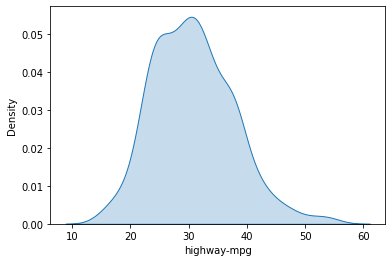

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.kdeplot(df['highway-mpg'], fill=True)
plt.show()

In [ ]:
### YOUR WORK HERE
from scipy import stats
stats.ttest_1samp(df_sample['highway-mpg'], popmean=35)

Ttest_1sampResult(statistic=-0.9570244044334747, pvalue=0.36355472283248624)

Pvalue is .36 > 0.05 for 95% confindence interval, we fail to reject the null. 

Imagine that you now have the capacity to test 100 cars on the lot. Using the same random state of `30`, what would you conclude when sampling 100 cars?

In [ ]:
### YOUR WORK HERE
df_sample100 = df.sample(100, random_state=30)
stats.ttest_1samp(df_sample100['highway-mpg'], popmean=35)

Ttest_1sampResult(statistic=-6.5185242467032305, pvalue=3.003137417468754e-09)

This time I reject the null and the salesman lies to me, since p value is smaller than 0.05. The more is the sample size, the more precisely it describes the population

Why might these two t-tests using the same dataset lead to different conclusions about the salesman's claim?

population size matters


## Practice 2-Sample T-tests

Two Sample t-tests determine whether or not two sample means are statistically different from each other. 

This portion of your assignment requires you to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). 


### 1) Load the data

The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

- Read the dataset in from UCI, you'll need to provide a list of column headers
- Encode "yes" votes as 1 and "no" votes as 0. (You can use `df.replace()` to swap out these values)
- Use dataframe filtering to split the dataframe into two new dataframes based on party. Hold all republicans in one dataframe and all democrats in the other. These will be our two different "samples."



In [ ]:
### YOUR WORK HERE
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df1 = pd.read_csv('house-votes-84.data', names=column_headers, na_values="?")
df1.dropna(inplace=True)
df1.replace('y', 1, inplace=True)
df1.replace('n', 0, inplace=True)
df1.head()

--2021-08-16 08:19:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.04s   

2021-08-16 08:19:12 (438 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


### 2) Perform two sample T-tests on different issues and report the results.

- Find an issue that democrats support more than republicans with p < 0.01 (significant at the 99% level).
- Find an issue that republicans support more than democrats with p < 0.01 (significant at the 99% level).
- Find an issue where the difference between republicans and democrats has p > 0.1 (Not significant at the 90% level - i.e. there may not be much of a difference the two sample means)

Please for each test that you run state your null and alternative hypothesis and then write a conclusion reflecting on the null and alternative hypothesis.

Remember, that two-sample t-tests will only tell us if the two groups are *different* from one another. We'll have to look at their sample means directly or use the sign on the t-statistic to know which of the two sample means is larger. 

$H_0 : \overline{x} == \mu$ (republicans support duty-free as much as democrats)

$H_a : \overline{x} \neq \mu$ (someone of them support it significantly less)

In [ ]:
### YOUR WORK HERE
rep = df1[df1['party'] == 'republican']
dem = df1[df1['party'] == 'democrat']

stats.ttest_ind(rep['duty-free'], dem['duty-free'])

Ttest_indResult(statistic=-8.792682717575486, pvalue=3.483731546112177e-16)

democrats support it more than repbulicans, p value is less than 0.01 for 99% interval. 

$H_0 : \overline{x} == \mu$ (Both parties equally support physician fee freeze)

$H_a : \overline{x} \neq \mu$ (republicans support physician fee freeze more)

In [ ]:
stats.ttest_ind(rep['physician-fee-freeze'], dem['physician-fee-freeze'])

Ttest_indResult(statistic=41.94745401614099, pvalue=9.726393032601933e-110)

based on results, t-stats shows the mean favors republicans, p value is < 0.01 for 99% confidence intervals. We can reject the null. Republicans indeed support the physician fee freeze more. 

$H_0 : \overline{x} == \mu$ (Both parties equally support water project)

$H_a : \overline{x} \neq \mu$ (republicans support water project more)

In [ ]:
stats.ttest_ind(rep['water-project'], dem['water-project'])

Ttest_indResult(statistic=0.3128208943045492, pvalue=0.7547001979801332)

because Pvalue is > 0.01, we fail to reject the null. 

## Stretch Goals:

### 1) Use functions and some iterator (for loop, .apply(), list comprehension, etc.) to perform two sample t-tests on every issue in the dataset in an automated fashion.

In [ ]:
### YOUR WORK HERE
issues = ['handicapped-infants', 'water-project','physician-fee-freeze', 'el-salvador-aid','religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']
for x in issues:
    ttest = stats.ttest_ind(rep[x], dem[x])
    if ttest[1] < .05:
        print(ttest, 'null hypothesis rejected')
    else:
        print(ttest, 'fail to reject null hypothesis')

Ttest_indResult(statistic=-6.240907554031057, pvalue=2.0722024876891192e-09) null hypothesis rejected
Ttest_indResult(statistic=0.3128208943045492, pvalue=0.7547001979801332) fail to reject null hypothesis
Ttest_indResult(statistic=41.94745401614099, pvalue=9.726393032601933e-110) null hypothesis rejected
Ttest_indResult(statistic=17.42676222846621, pvalue=6.337148100603545e-44) null hypothesis rejected
Ttest_indResult(statistic=7.51827419959023, pvalue=1.2327152712646607e-12) null hypothesis rejected
Ttest_indResult(statistic=-8.700290514400237, pvalue=6.437744771734974e-16) null hypothesis rejected
Ttest_indResult(statistic=-14.107516419917083, pvalue=5.607962900152492e-33) null hypothesis rejected
Ttest_indResult(statistic=-12.975290759761135, pvalue=2.967051309761917e-29) null hypothesis rejected
Ttest_indResult(statistic=0.6366340860076748, pvalue=0.5249963080040427) fail to reject null hypothesis
Ttest_indResult(statistic=-6.002047990918205, pvalue=7.520282442196167e-09) null hyp



### 2) Work on Performing a T-test without using Scipy in order to get "under the hood" and learn more thoroughly about this topic.
### Start with a 1-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://blog.minitab.com/hs-fs/hubfs/Imported_Blog_Media/701f9c0efa98a38fb397f3c3ec459b66.png?width=247&height=172&name=701f9c0efa98a38fb397f3c3ec459b66.png) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

### Be sure to check your work using Scipy!





Conditions:
- independent values
- continuous data
- obtained via SRS
- population distribution is assumed normal

In [ ]:
df['highway-mpg'].mean()

30.75121951219512

Null hypothesis: population mean == 30.75121951219512

Alternative hypothesis: popualtion mean != 30.75121951219512

In [ ]:
import statistics
import math
import scipy.integrate as integrate

t_score = (df_sample100['highway-mpg'].mean() - df['highway-mpg'].mean())/(statistics.stdev(df_sample100['highway-mpg'])/math.sqrt(len(df_sample100)))

f = lambda x: stats.t.pdf(x, len(df_sample100)-1)
p_val = integrate.quad(f, -8, t_score)[0]*2
print(f'{p_val} > .05,', 'fail to reject null hypothesis')

0.8682745977134941 > .05, fail to reject null hypothesis


In [ ]:
stats.ttest_1samp(df_sample100['highway-mpg'], 30.75121951219512 ,nan_policy='omit', )

Ttest_1sampResult(statistic=-0.16628144196110028, pvalue=0.8682745977159305)

In [ ]:
### YOUR WORK HERE

### 3) Then try a 2-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://lh3.googleusercontent.com/proxy/rJJ5ZOL9ZDvKOOeBihXoZDgfk7uv1YsRzSQ1Tc10RX-r2HrRpRLVqlE9CWX23csYQXcTniFwlBg3H-qR8MKJPBGnjwndqlhDX3JxoDE5Yg) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

 ### Be sure to check your work using Scipy!

$H_0 : \mu_1 == \mu_2$

$H_a : \mu_1 \neq \mu_2$

In [29]:
sp2 =  ((statistics.stdev(rep['water-project'])**2)*(len(rep['water-project']) - 1) + (statistics.stdev(dem['water-project'])**2)*(len(dem['water-project']) - 1))/(len(rep['water-project']) - 1 + len(dem['water-project']) - 1)
tscore = (rep['water-project'].mean() - dem['water-project'].mean())/math.sqrt(sp2/(len(dem)) + sp2/(len(rep)))
f1 = lambda x: stats.t.pdf(x, (len(dem)-1 + len(rep) -1))
print('p-value = ', integrate.quad(f1, tscore, 9)[0]*2, ', null hypothesis is not rejected')

p-value =  0.7547001979800403 , null hypothesis is not rejected
